In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [2]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.shape

(2224, 11)

In [4]:
from datetime import datetime
def getMonth(datestring):   
        return datetime.strptime(datestring, '%d-%m-%y').month
def getYear(datestring):   
        return datetime.strptime(datestring, '%d-%m-%y').year   
def getDay(datestring):   
        return datetime.strptime(datestring, '%d-%m-%y').day

In [5]:
df['month'] = df['Date'].apply(getMonth)
df['year'] = df['Date'].apply(getYear)


In [6]:
df['Day'] = df['Date'].apply(getDay)

In [7]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,year,Day
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015,4
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015,5
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,2015,4
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,2015,6
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,2015,6
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,2015,23


In [8]:
daywise = df.groupby(['month','Day']).size().unstack().transpose().fillna(0)
daywise

month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
4,18.0,27.0,15.0,12.0,6.0,13.0,25.0,28.0,21.0,21.0,5.0,15.0
5,12.0,7.0,5.0,12.0,14.0,14.0,15.0,15.0,11.0,7.0,12.0,7.0
6,25.0,25.0,25.0,12.0,29.0,11.0,9.0,24.0,23.0,25.0,21.0,43.0
13,0.0,0.0,0.0,24.0,12.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,23.0,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,12.0,12.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,20.0,16.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,21.0,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,8.0,14.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='month', ylabel='Day'>

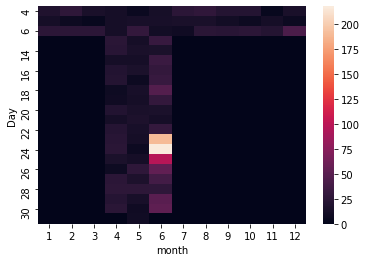

In [9]:
sns.heatmap(daywise)

In [10]:
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])
df["Date_month_year"].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-02-05      7
2015-12-05      7
2015-05-04      6
2015-03-05      5
2015-11-04      5
Name: Date_month_year, Length: 91, dtype: int64

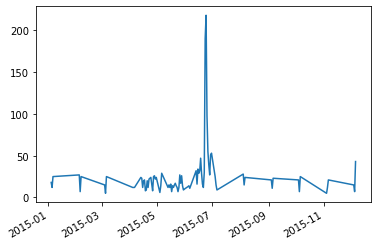

In [11]:
df["Date_month_year"].value_counts().plot();

In [12]:
# group by month and year, get the size
df_m = df.groupby(['month', 'year']).size()


In [13]:

df_m = df_m.unstack(level=0)

In [14]:
df_m

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,55,59,45,375,317,1046,49,67,55,53,38,65


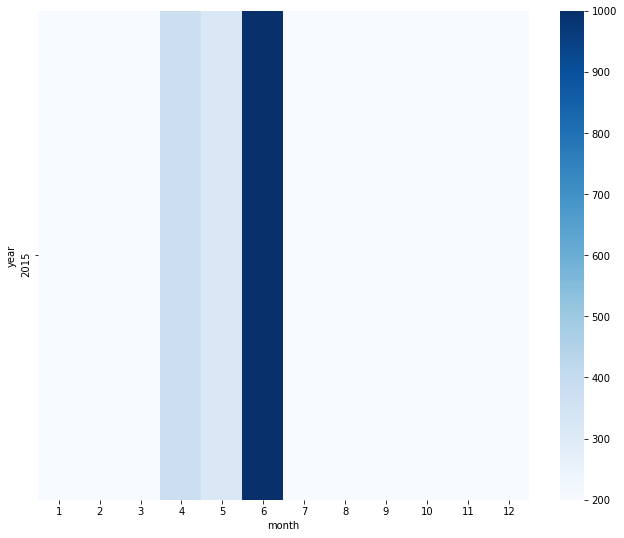

In [15]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df_m, cmap="Blues", vmin= 200, vmax=1000)
plt.show()

In [16]:
df.groupby('State').size().sort_values(ascending=False)

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

In [17]:
df.groupby(['State','City']).size().sort_values(ascending=False)

State          City        
Georgia        Atlanta         63
Illinois       Chicago         47
Tennessee      Knoxville       36
Texas          Houston         33
Florida        Jacksonville    30
                               ..
Indiana        Osceola          1
               Richmond         1
               Shelbyville      1
               Valparaiso       1
West Virginia  Weirton          1
Length: 1007, dtype: int64

In [18]:
df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [19]:
def newStatus(status):
    if status == "Open" or status == "Pending":
        return "Open"
    else:
        return "Closed"
    

In [20]:
df['Status'] = df['Status'].apply(newStatus)


In [21]:
df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

In [22]:
complaints_status = df.groupby(["State","Status"]).size().unstack().fillna(0)
complaints_status

Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

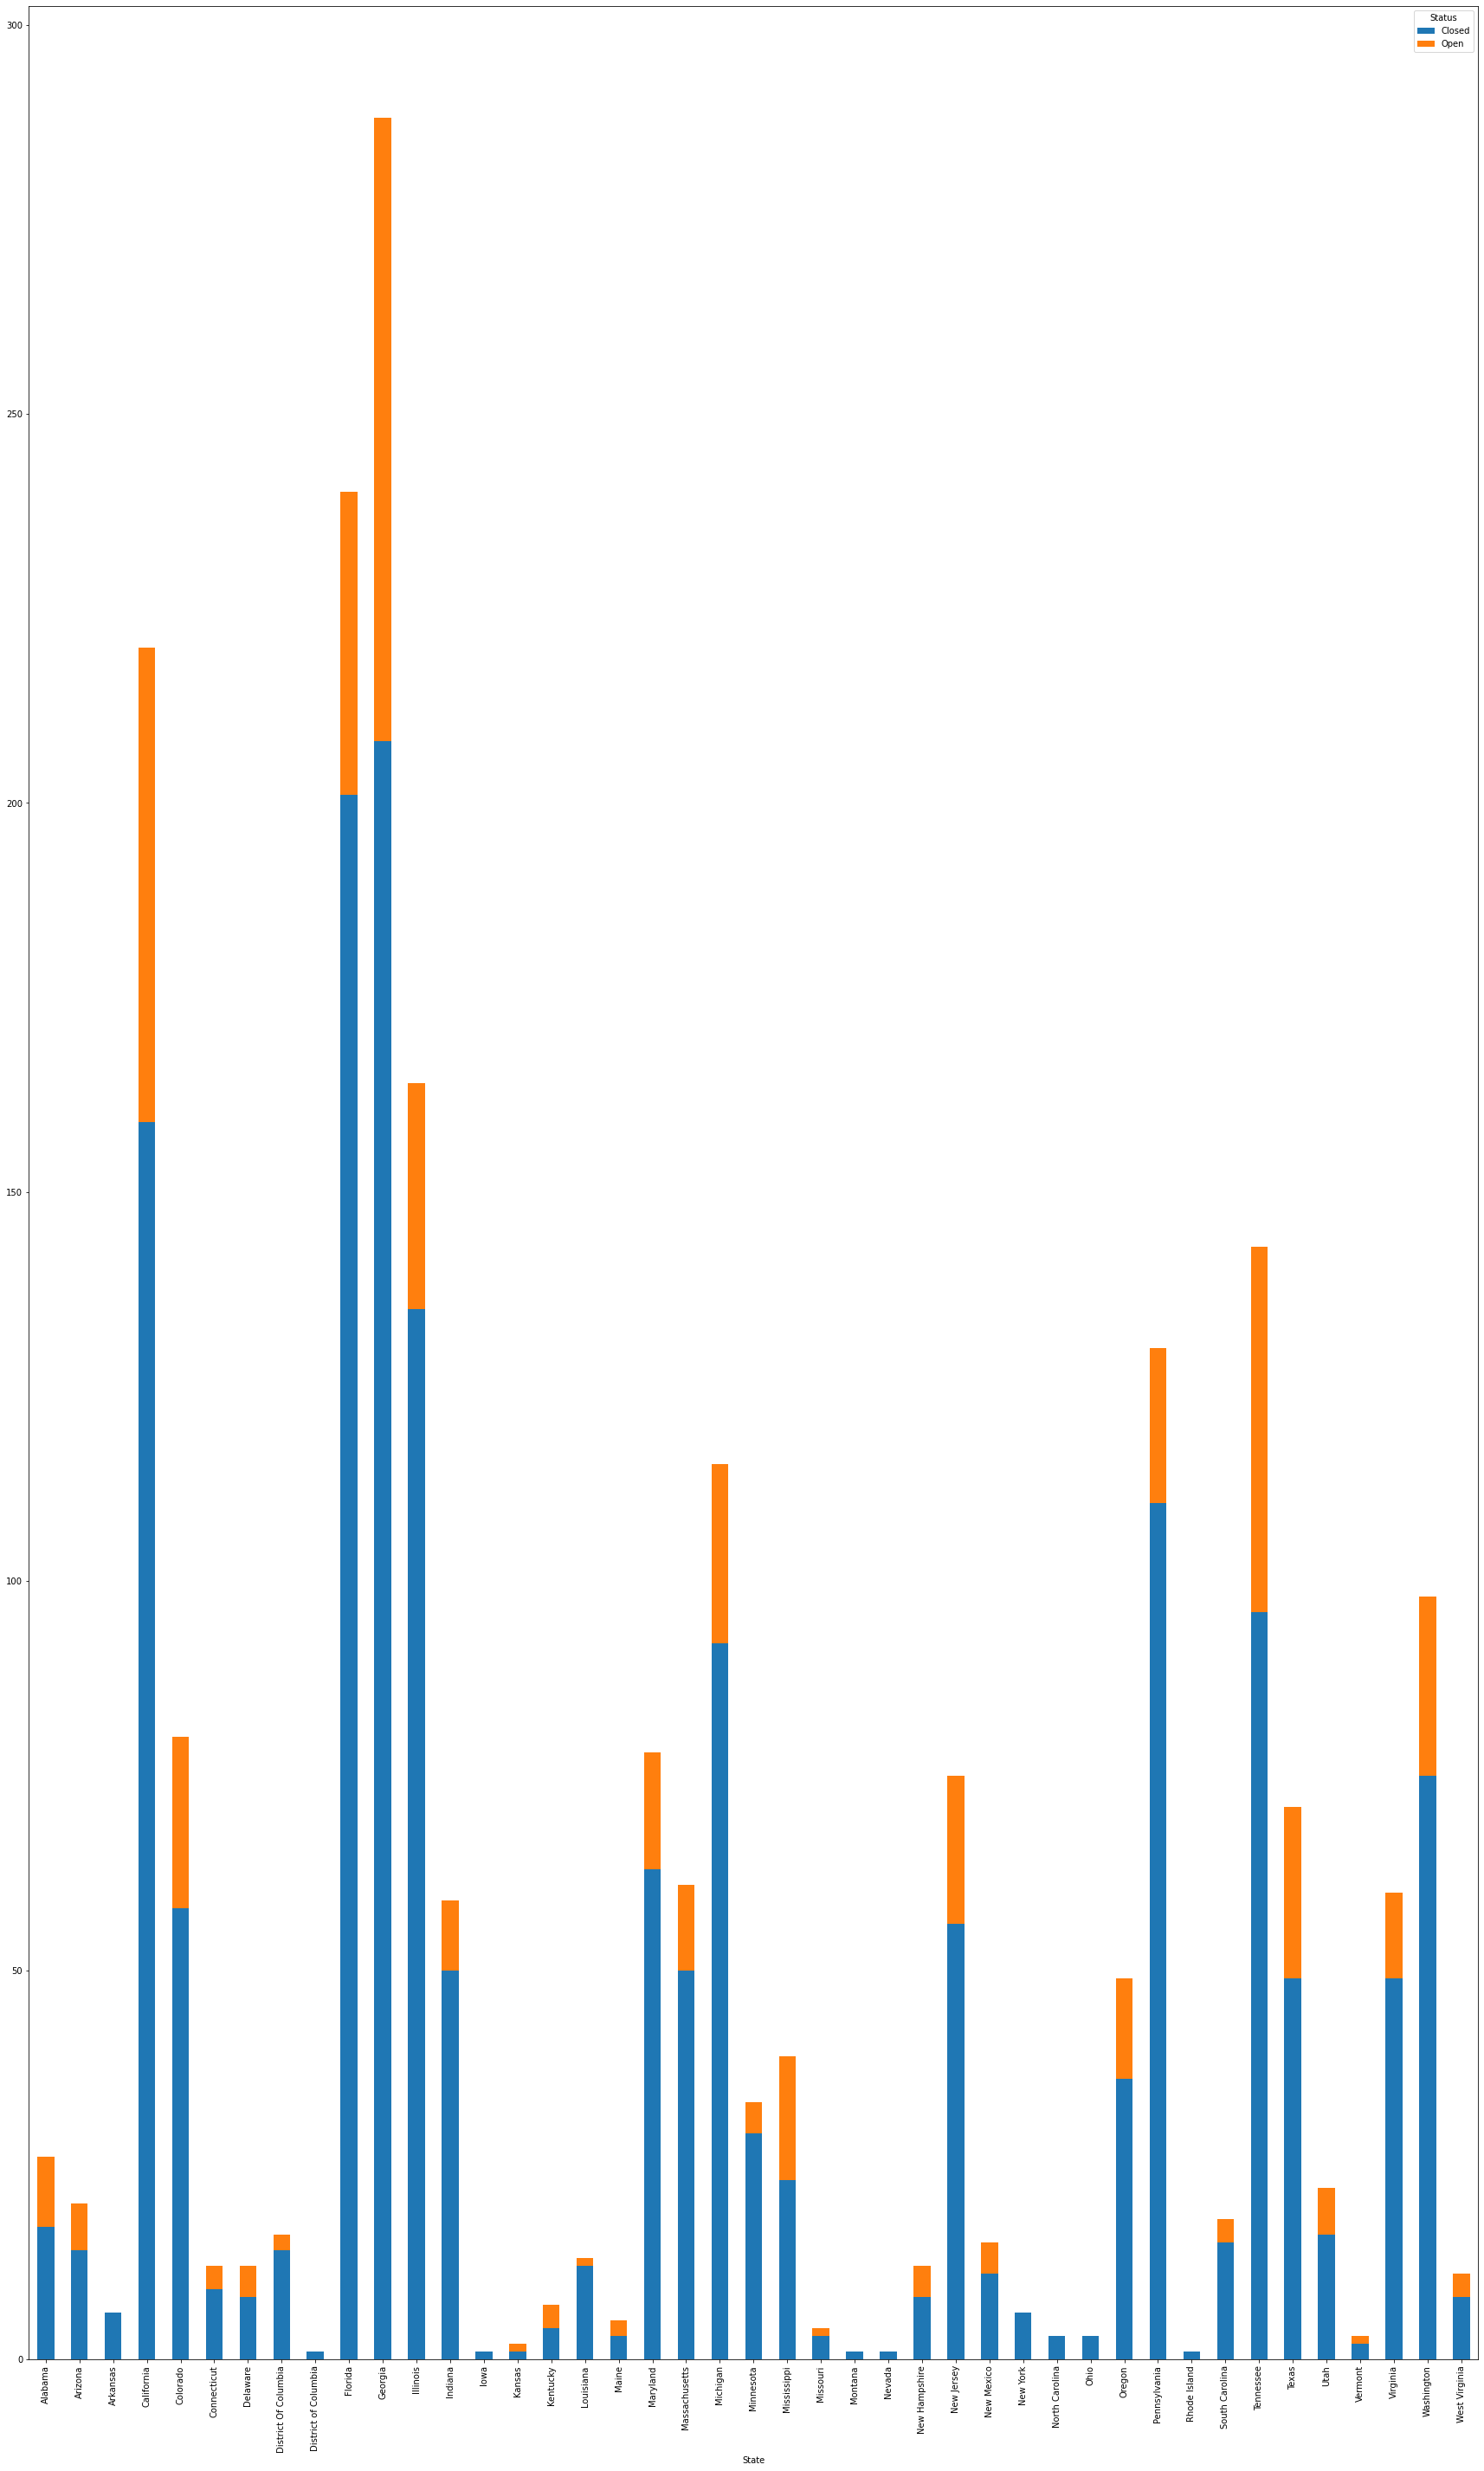

In [23]:
complaints_status.plot(kind="bar", figsize=(30,50), stacked=True)

In [24]:
 x = df.groupby(["State"]).get_group('Georgia').groupby('City').size()

<AxesSubplot:xlabel='City'>

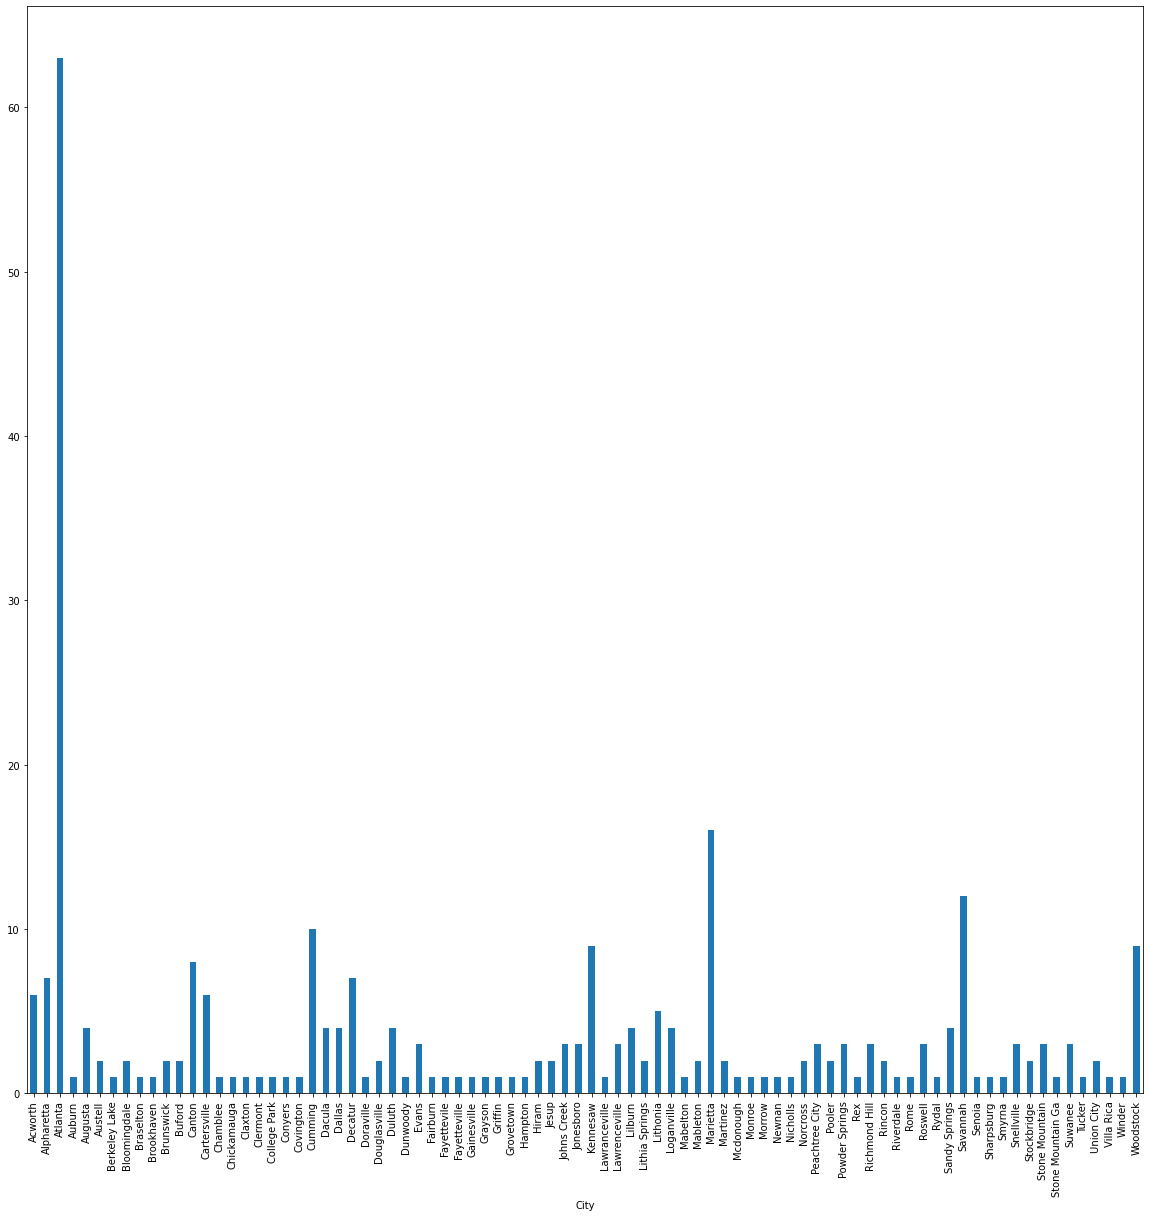

In [25]:
x.plot(kind="bar", figsize=(20,20), stacked=True)

In [26]:
#Provide a table with the frequency of complaint types.
cust_complaints = df['Customer Complaint'].value_counts()[:10]

<AxesSubplot:>

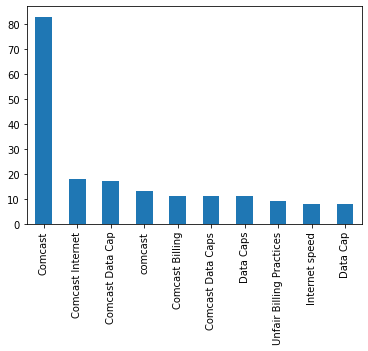

In [27]:
cust_complaints.plot(kind='bar')

In [28]:
received_via = df['Received Via'].value_counts()
received_via

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

<AxesSubplot:>

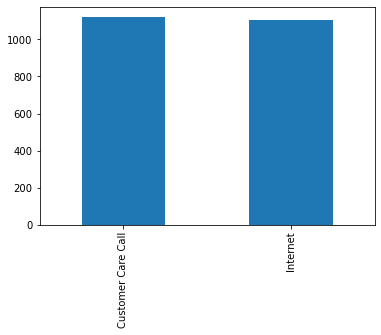

In [29]:
received_via.plot(kind='bar')

In [30]:
received_via_status = df.groupby(['Received Via', 'Status']).size().unstack()
received_via_status

Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


<AxesSubplot:xlabel='Received Via'>

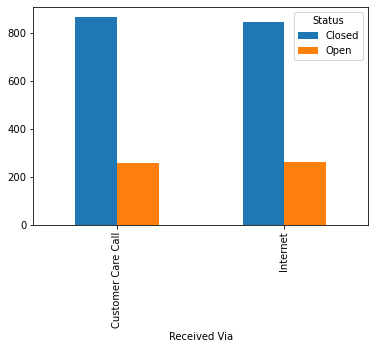

In [31]:
received_via_status.plot(kind='bar')

In [32]:
stat = df['Status'].value_counts()
stat

Closed    1707
Open       517
Name: Status, dtype: int64

<AxesSubplot:>

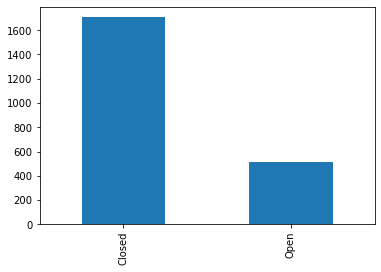

In [33]:
stat.plot(kind="bar")

In [34]:

complaints_status_citywise = df.groupby(["City","Status"]).size().unstack().fillna(0)[:200]
complaints_status_citywise

Status,Closed,Open
City,,
Abingdon,1.0,0.0
Acworth,4.0,2.0
Adrian,1.0,0.0
Alameda,1.0,1.0
Albuquerque,4.0,1.0
...,...,...
Dartmouth,0.0,1.0
Davidsonville,1.0,0.0
Davie,2.0,0.0


<AxesSubplot:ylabel='City'>

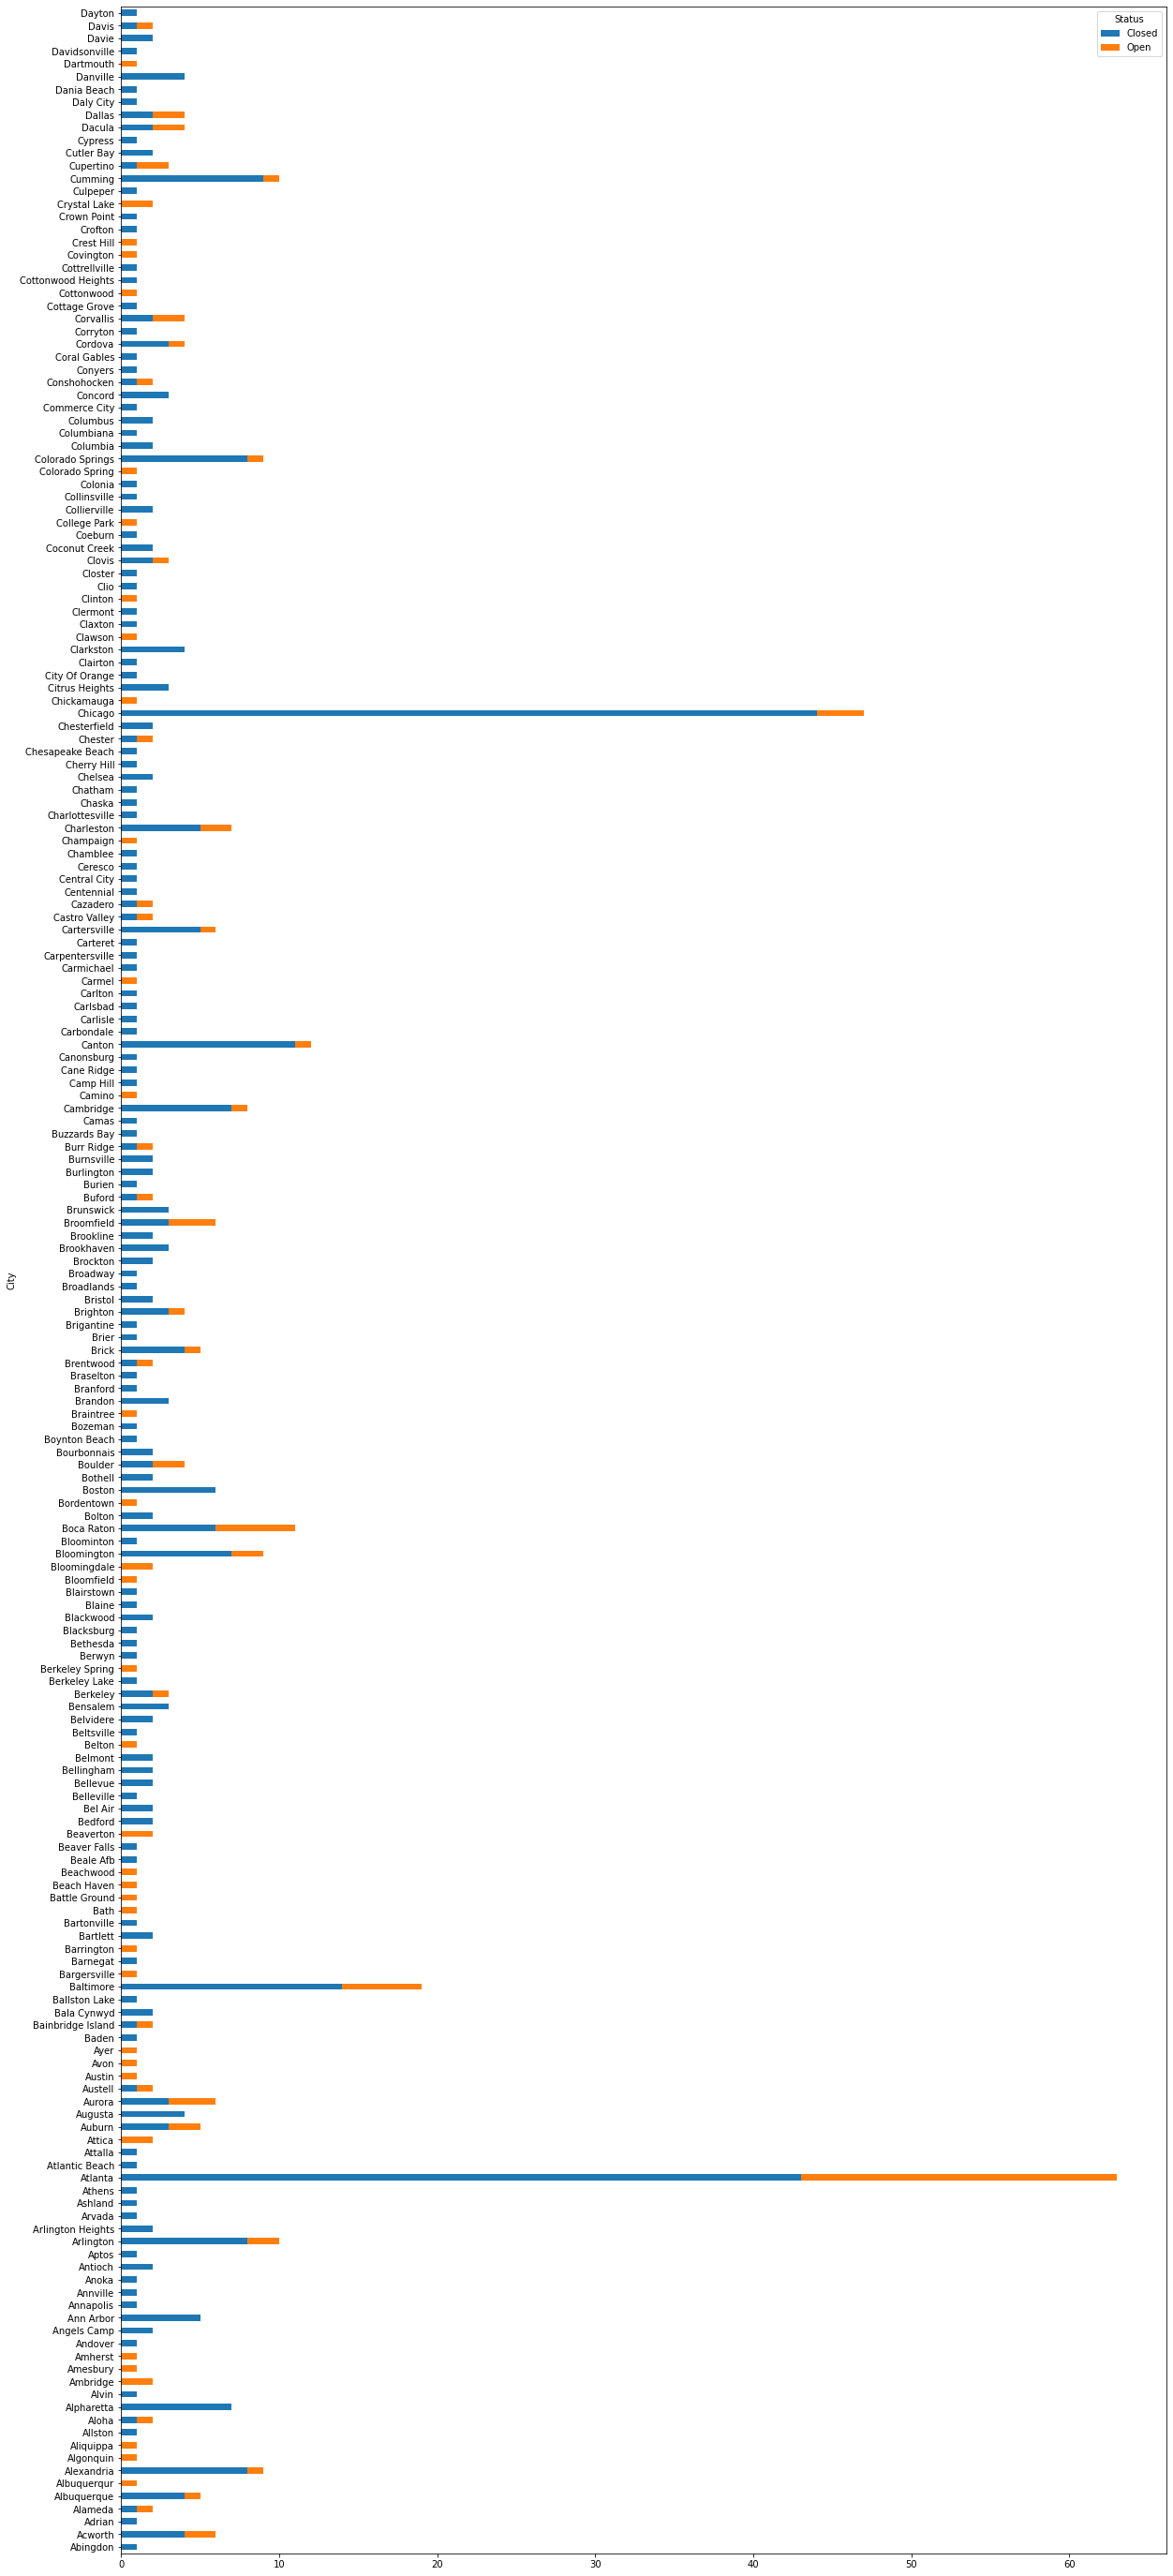

In [35]:
complaints_status_citywise.plot(kind="barh", figsize=(20,50), stacked=True)

In [36]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
closed = df[df['Status'] == 'Closed']['Customer Complaint'].count()
open_num = df[df['Status'] == 'Open']['Customer Complaint'].count()
total = closed + open_num
percentage_closed = (closed / total) * 100
percentage_closed

76.75359712230215

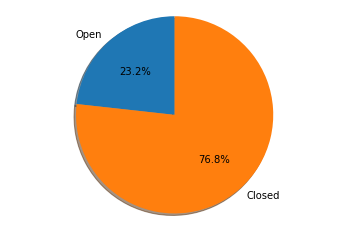

In [37]:
# Pie chart
labels = 'Open', 'Closed'
sizes = [open_num, closed]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()